# Predicting Car Prices

The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. 

The goal of this project is to predict a car's market price using its attributes.

To read more about the data set we can [here](https://archive.ics.uci.edu/ml/datasets/automobile)


##  Introduction to the data set


In [1]:
import pandas as pd

pd.options.display.max_columns = 99

columns = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_doors', 'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 'num_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']

cars = pd.read_csv('imports-85.data', names = columns)

cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [2]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    205 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            205 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           205 non-nul


Attribute Information: Attribute Range

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make: alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo
4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.


## Data Cleaning

In [3]:
import numpy as np

#select only columns with continuous values
continuous_columns = ['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']

df = cars[continuous_columns]

df.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
# replace all the '?' values to numpy.nan
df= df.replace('?', np.nan)
df.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
#change the type of columns
df = df.astype(float)

In [6]:
#find the number of missing values from  columns
df.isna().sum().to_frame(name="nans").query("nans > 0")["nans"]

normalized_losses    41
bore                  4
stroke                4
horsepower            2
peak_rpm              2
price                 4
Name: nans, dtype: int64

In [7]:
# drop 4 rows with missing values in 'price' column
df = df.dropna(subset=['price'])

In [8]:
#fill with mean all the missing values
df = df.fillna(df.mean())


In [9]:
# check missing values
df.isnull().sum()

normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [10]:
# normalize columns
price_col = df['price']
normalized_df = (df - df.mean()) / (df.std())
normalized_df['price'] = price_col

In [11]:
normalized_df


,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.000000,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,0.075201,0.519597,-1.825369,-0.290709,0.203476,-0.245942,-0.650624,-0.540937,13495.0
1,0.000000,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,0.075201,0.519597,-1.825369,-0.290709,0.203476,-0.245942,-0.650624,-0.540937,16500.0
2,0.000000,-0.708334,-0.243544,-0.185134,-0.558319,0.516789,0.604724,-2.427374,0.674254,-0.290709,1.354267,-0.245942,-0.961995,-0.687669,16500.0
3,1.312654,0.165335,0.194690,0.147966,0.217881,-0.422710,-0.430252,-0.524899,0.452769,-0.041019,-0.037387,0.799836,-0.183569,-0.100741,13950.0
4,1.312654,0.099398,0.194690,0.243137,0.217881,0.518722,0.219617,-0.524899,0.452769,-0.540399,0.310527,0.799836,-1.117680,-1.274597,17450.0
5,0.000000,0.165335,0.251498,0.195551,-0.272351,-0.094079,0.219617,-0.524899,0.452769,-0.415554,0.176714,0.799836,-0.961995,-0.834401,15250.0
6,1.125132,1.154395,1.501278,2.622423,0.789818,0.557385,0.219617,-0.524899,0.452769,-0.415554,0.176714,0.799836,-0.961995,-0.834401,17710.0
7,0.000000,1.154395,1.501278,2.622423,0.789818,0.770029,0.219617,-0.524899,0.452769,-0.415554,0.176714,0.799836,-0.961995,-0.834401,18920.0
8,1.125132,1.154395,1.501278,2.622423,0.871523,1.025201,0.099271,-0.748720,0.452769,-0.465492,0.979591,0.799836,-1.273365,-1.568060,23875.0
10,2.187756,0.396116,0.210921,-0.518235,0.217881,-0.310589,-0.454322,0.631507,-1.445680,-0.340647,-0.064150,1.427302,-0.339254,-0.247473,16430.0


## Univariate Model

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
    
def knn_train_test(train_col, target_col, df):
    
    np.random.seed(1)
    shuffled_df = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_df)
    training_test_index = round(len(random_df)/2)
    
    training_set = random_df.iloc[:training_test_index]
    test_set = random_df.iloc[training_test_index:]
    
    model = KNeighborsRegressor()
    model.fit(training_set[[train_col]], training_set[target_col])
    predictions = model.predict(test_set[[train_col]])
    mse = mean_squared_error(test_set[target_col], predictions)
    rmse = mse**(.5)
    return rmse

In [13]:
#test knn_train_test() function
test_1 = knn_train_test('normalized_losses', 'price', df)
test_1

7339.675755133537

In [14]:
#make a dictionary where key=column, value=rmse

rmse_values = dict()

all_features = df.columns.tolist()
all_features.remove('price')

for column in all_features:
    rmse = knn_train_test(column, 'price', df)
    rmse_values[column] = rmse
   

In [15]:
#make rmse_values more readable

rmse_values_series = pd.Series(rmse_values)
rmse_values_series.sort_values()

engine_size          3271.449938
horsepower           4048.437725
curb_weight          4445.141920
highway_mpg          4643.046278
city_mpg             4760.449842
width                4772.459149
length               5428.810101
wheel_base           5460.851458
compression_ratio    6610.812153
bore                 6795.388312
normalized_losses    7339.675755
peak_rpm             7649.170564
stroke               7954.301034
height               8073.119759
dtype: float64

Let's modify the knn_train_test() function to accept a parameter for the k value.


In [16]:
def knn_train_test_k(train_col, target_col, df):
    np.random.seed(1)
    shuffled_df = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_df)
    training_test_index = round(len(random_df)/2)
    
    training_set = random_df.iloc[:training_test_index]
    test_set = random_df.iloc[training_test_index:]
    
    k_values = [1, 3, 5, 7, 9]
    k_rmses = dict()
    
    for k in k_values:
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(training_set[[train_col]], training_set[target_col])
        predictions = model.predict(test_set[[train_col]])
        mse = mean_squared_error(test_set[target_col], predictions)
        rmse = mse**(.5)
        k_rmses[k] = rmse
    return k_rmses
    

In [17]:
#make a dictionary where key=column, value=rmse and k-values represents

k_rmse_values = dict()

for column in all_features:
    rmse = knn_train_test_k(column, 'price', df)
    k_rmse_values[column] = rmse

k_rmse_values    

{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6795.388311535586,
  7: 6896.559499627726,
  9: 6882.822815090022},
 'city_mpg': {1: 5901.143574354764,
  3: 4608.180446380397,
  5: 4760.44984187731,
  7: 5218.847825621605,
  9: 5446.82446248222},
 'compression_ratio': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb_weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4445.141920375235,
  7: 4330.608104418053,
  9: 4632.92525121302},
 'engine_size': {1: 3258.4861059962027,
  3: 2951.5259704863593,
  5: 3271.449938331611,
  7: 3563.086774256415,
  9: 3831.8244149840766},
 'height': {1: 8751.160007407449,
  3: 8121.165102604576,
  5: 8073.1197593196175,
  7: 7693.302663098179,
  9: 7776.396862418894},
 'highway_mpg': {1: 6025.594966720739,
  3: 4671.390389789466,
  5: 4643.046277675214,
  7: 4792.485755925797,
  9: 5227.337381566373},
 'horsepower': {1: 4170.054848037801,
  3: 4020.105451002

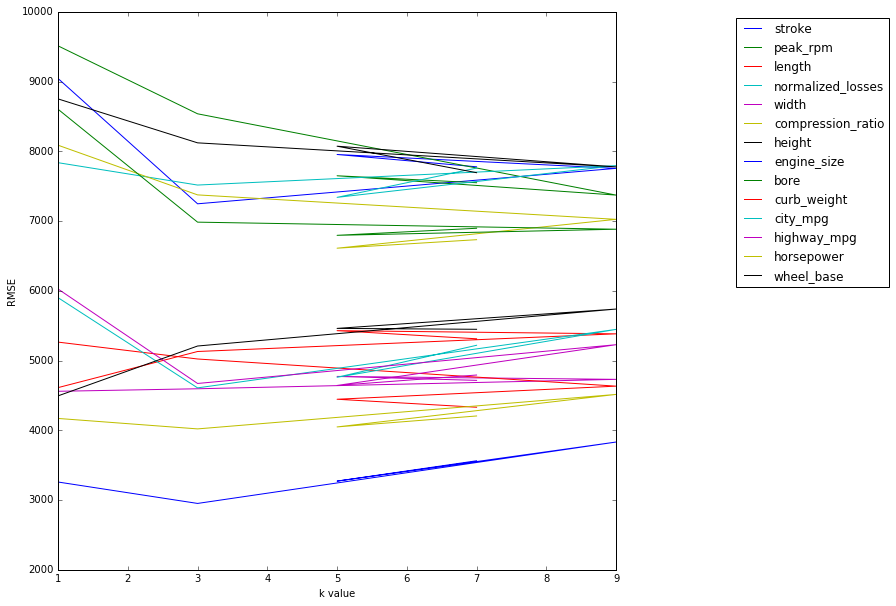

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))

for k,v in k_rmse_values.items():
    
    x = list(v.keys())
    y = list(v.values()) 
    
    plt.plot(x,y, label="{}".format(k))
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend(bbox_to_anchor=(1.5, 1))   




## Multivariate Model

Let's modify the knn_train_test_k() function to accept a list of column names (instead of just a string). We will modify the rest of the function logic to use this parameter:
- instead of using just a single column for train and test, we'll use all of the columns passed in.
- and we'll use a the default k value.


Then we will use the best 2 features to 5 best features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.


In [19]:
#Let's compute the mean of every k-value from previous step

five_values = dict()

for k,v in k_rmse_values.items():
    avg_rmse = np.mean(list(v.values()))    
    five_values[k] = avg_rmse
    
five_values_series = pd.Series(five_values)
five_values_series.sort_values() 

engine_size          3375.274641
horsepower           4191.699237
width                4674.698766
curb_weight          4739.056704
highway_mpg          5071.970954
length               5173.087449
city_mpg             5187.089230
wheel_base           5269.898315
compression_ratio    7166.073599
bore                 7232.319720
normalized_losses    7649.281809
stroke               7955.585214
height               8083.028879
peak_rpm             8124.022815
dtype: float64

In [20]:
# modify the knn_train_test_k() function to accept a list of column names

def multi_knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    shuffled_df = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_df)
    training_test_index = round(len(random_df)/2)
    
    training_set = random_df.iloc[:training_test_index]
    test_set = random_df.iloc[training_test_index:]
    
    k_values = [5]
    k_rmses = dict()
    
    for k in k_values:
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(training_set[train_cols], training_set[target_col])
        predictions = model.predict(test_set[train_cols])
        mse = mean_squared_error(test_set[target_col], predictions)
        rmse = mse**(.5)
        k_rmses[k] = rmse
    return k_rmses

best_five = five_values_series.sort_values()[:5]
list_best_five = best_five.index.tolist()
list_best_five


['engine_size', 'horsepower', 'width', 'curb_weight', 'highway_mpg']

In [21]:
# make a dictionary with the best 2 to 5 features
multi_models = dict()
for i in range(2, 6):
    train_cols = list_best_five[:i]
    multi_rmse = multi_knn_train_test(train_cols, 'price', df)   
    multi_models['{} best features'.format(i)] = multi_rmse
    
multi_models

{'2 best features': {5: 2925.00464591321},
 '3 best features': {5: 2901.007254846714},
 '4 best features': {5: 3864.067381953533},
 '5 best features': {5: 3870.6838798617723}}

## Hyperparameter Tuning

Let's vary the hyperparameter value from 1 to 25 and plot the resulting RMSE values for the top 3 models in the last step.

In [22]:
def hp_knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    shuffled_df = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_df)
    training_test_index = round(len(random_df)/2)
    
    training_set = random_df.iloc[:training_test_index]
    test_set = random_df.iloc[training_test_index:]
    
    hp_rmses = dict()
    hyper_params = [i for i in range(1,26)]
    
    for k in hyper_params:
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(training_set[train_cols], training_set[target_col])
        predictions = model.predict(test_set[train_cols])
        mse = mean_squared_error(test_set[target_col], predictions)
        rmse = mse**(.5) 
        hp_rmses[k] = rmse
    return hp_rmses


In [23]:
top_3_models = dict()

for i in range(2, 6):
    train_cols = list_best_five[:i]
    if i == 5:  # we will choose only the 2, 3, and 4 multivariate models from best 5 
        continue
    top_3_rmse = hp_knn_train_test(train_cols, 'price', df)   
    top_3_models['{} best features'.format(i)] = top_3_rmse
    
top_3_models


{'2 best features': {1: 2832.6762159757077,
  2: 2592.760534757126,
  3: 2620.327691572396,
  4: 2824.6258095735284,
  5: 2925.00464591321,
  6: 3162.7465130445685,
  7: 3295.7806528253186,
  8: 3580.3376319325566,
  9: 3844.44037715117,
  10: 4066.955641740046,
  11: 4162.831387739917,
  12: 4250.9953344770765,
  13: 4288.279719198008,
  14: 4318.677524353425,
  15: 4384.634184404111,
  16: 4477.339380724929,
  17: 4542.7101905616355,
  18: 4675.594058904271,
  19: 4696.93629950144,
  20: 4684.844437694387,
  21: 4744.078137218994,
  22: 4779.969895724662,
  23: 4826.869687492047,
  24: 4881.349005863175,
  25: 4963.926213279482},
 '3 best features': {1: 2861.158731550683,
  2: 2644.428153665928,
  3: 2681.7457878865184,
  4: 2722.280458854013,
  5: 2901.007254846714,
  6: 3079.0995987640463,
  7: 3210.5192759138426,
  8: 3485.8385181559474,
  9: 3782.798641745253,
  10: 4029.356670465123,
  11: 4133.471835231293,
  12: 4225.481801502254,
  13: 4232.577904328598,
  14: 4309.0412427890

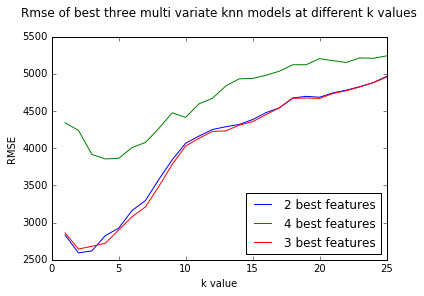

In [24]:
for k,v in top_3_models.items():
    x = list(v.keys())
    y = list(v.values())  
    plt.plot(x,y, label="{}".format(k))

plt.title("Rmse of best three multi variate knn models at different k values\n")    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend(loc='lower right')

In [25]:
#find out the min RMSE of each model

for model, k_val in top_3_models.items():
    k = min(k_val, key = k_val.get)
    min_rmse = k_val[k]
    print("The optimal k value for the {} multivariate model is {} with a RMSE = {}"
         .format(model, k, min_rmse))   

The optimal k value for the 2 best features multivariate model is 2 with a RMSE = 2592.760534757126
The optimal k value for the 4 best features multivariate model is 4 with a RMSE = 3855.6983724555575
The optimal k value for the 3 best features multivariate model is 2 with a RMSE = 2644.428153665928


## Conclusion

1. We predicted car's market price using univariate model, univariate model and changing the  hyperparameter

2. For the best model the lowest RMSE is 2644.428153665928. This model has 2 features: engine_size, horsepower. The optimal k value for this model is 2.

3. As we know the more features we use the more accurate RMSE we could get. So this test/train model has an important disavantage due to the high bias we can generate choosing only a part of our data for training.

4. To solve this problem we could choose a k fold cross validation model instead

